# Sk-learn

 Load this dataset and visualize it


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/archive.zip")

In [ ]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

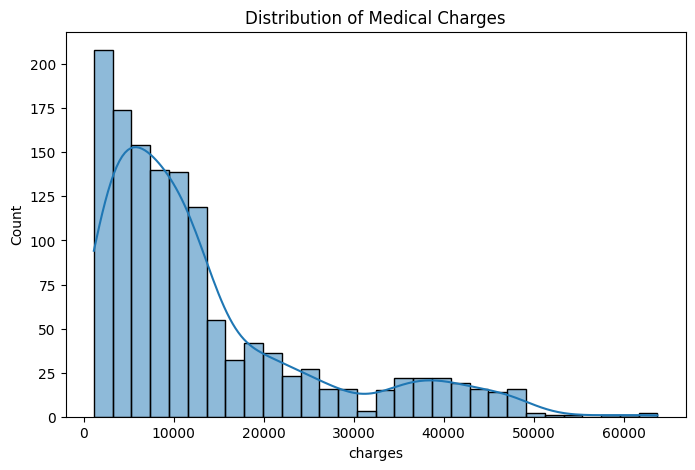

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title("Distribution of Medical Charges")
plt.show()


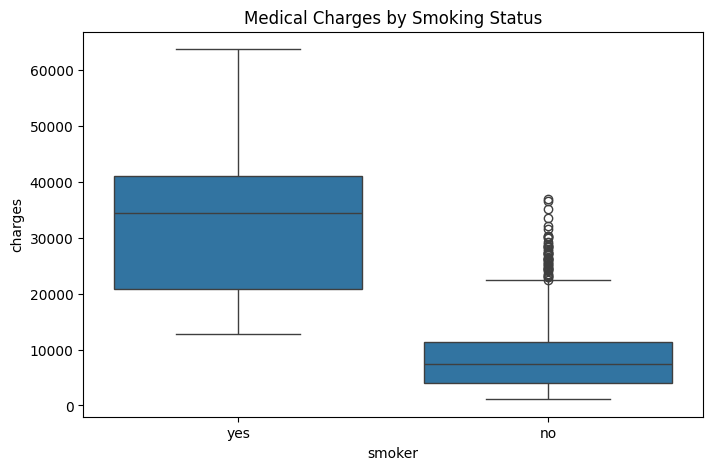

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Medical Charges by Smoking Status")
plt.show()

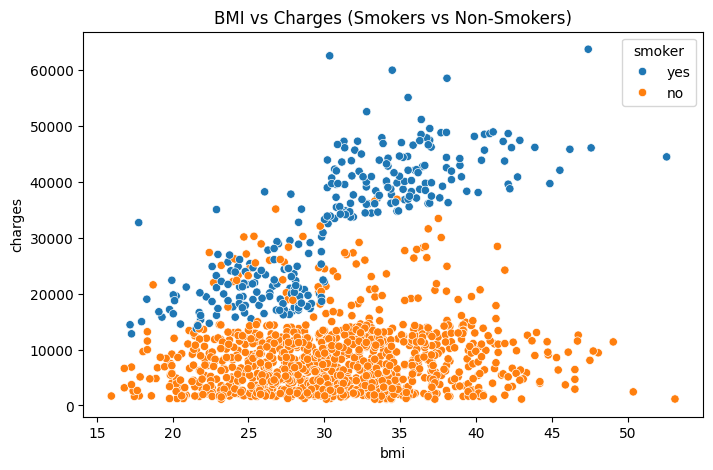

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("BMI vs Charges (Smokers vs Non-Smokers)")
plt.show()

Split the data into test (30%), train (60%), and validation (10%). Randomize/Shuffle the data and visualize it.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

train_df, temp_df = train_test_split(
    df,
    test_size=0.4,
    random_state=42,
    shuffle=True
)

test_df, val_df = train_test_split(
    temp_df,
    test_size=0.25,
    random_state=42,
    shuffle=True
)


n = len(df)
print(f"Total rows: {n}")
print(f"Train: {len(train_df)}  ({len(train_df)/n:.1%})")
print(f"Test:  {len(test_df)}   ({len(test_df)/n:.1%})")
print(f"Val:   {len(val_df)}    ({len(val_df)/n:.1%})")


Total rows: 1338
Train: 802  (59.9%)
Test:  402   (30.0%)
Val:   134    (10.0%)


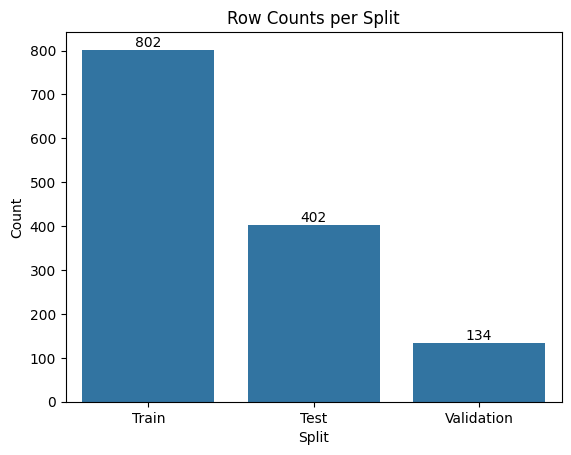

In [ ]:
import numpy as np

split_counts = pd.DataFrame({
    "Split": ["Train", "Test", "Validation"],
    "Count": [len(train_df), len(test_df), len(val_df)]
})

ax = sns.barplot(data=split_counts, x="Split", y="Count")
ax.set_title("Row Counts per Split")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.show()


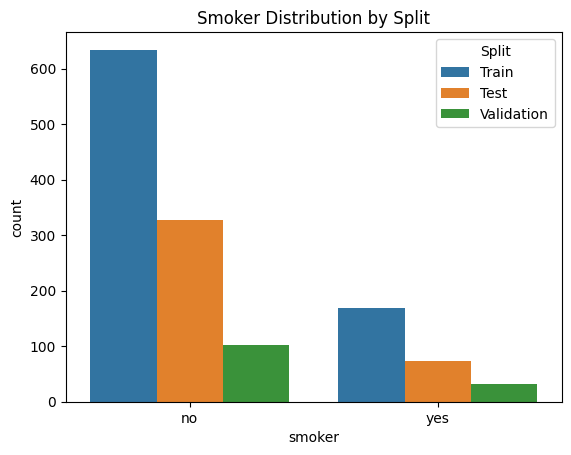

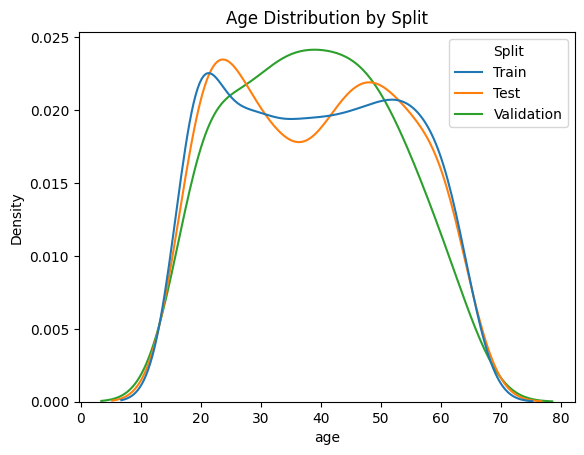

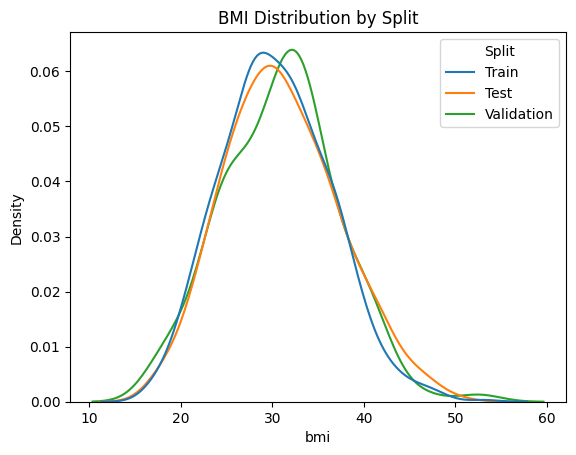

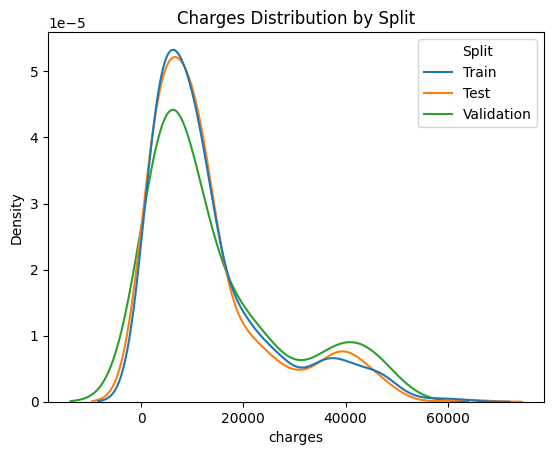

In [ ]:
# Add a Split label to each piece and stack them for plotting
train_plot = train_df.assign(Split="Train")
test_plot  = test_df.assign(Split="Test")
val_plot   = val_df.assign(Split="Validation")
stacked = pd.concat([train_plot, test_plot, val_plot], ignore_index=True)

# 1) Categorical balance example: smokers per split
ax = sns.countplot(data=stacked, x="smoker", hue="Split")
ax.set_title("Smoker Distribution by Split")
plt.show()

# 2) Numeric distributions: age
ax = sns.kdeplot(data=stacked, x="age", hue="Split", common_norm=False)
ax.set_title("Age Distribution by Split")
plt.show()

# 3) Numeric distributions: BMI
ax = sns.kdeplot(data=stacked, x="bmi", hue="Split", common_norm=False)
ax.set_title("BMI Distribution by Split")
plt.show()

# 4) Target variable distribution: charges
ax = sns.kdeplot(data=stacked, x="charges", hue="Split", common_norm=False)
ax.set_title("Charges Distribution by Split")
plt.show()


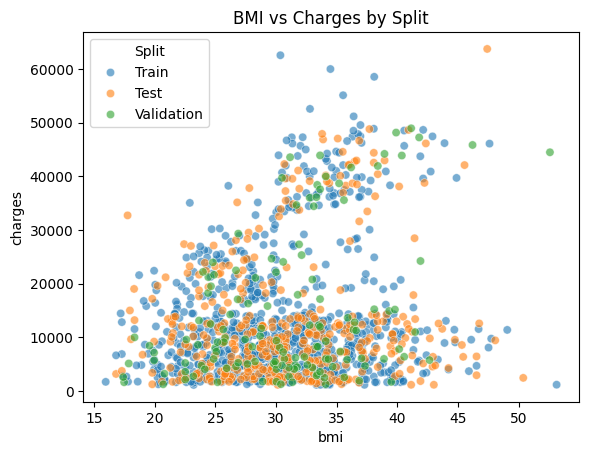

In [ ]:
ax = sns.scatterplot(data=stacked, x="bmi", y="charges", hue="Split", alpha=0.6)
ax.set_title("BMI vs Charges by Split")
plt.show()


Use StandardScaler and MinMaxScaler from sklearn.preprocessing to scale the numerical features (e.g., age, bmi, charges).
Visualize the effect of both scaling techniques using histograms or boxplots.


In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_features = ["age", "bmi", "charges"]
df_num = df[num_features]


standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()


df_standard = pd.DataFrame(
    standard_scaler.fit_transform(df_num),
    columns=num_features
)

df_minmax = pd.DataFrame(
    minmax_scaler.fit_transform(df_num),
    columns=num_features
)


df_standard = df_standard.add_suffix("_standard")
df_minmax = df_minmax.add_suffix("_minmax")


df_scaled = pd.concat([df_num, df_standard, df_minmax], axis=1)


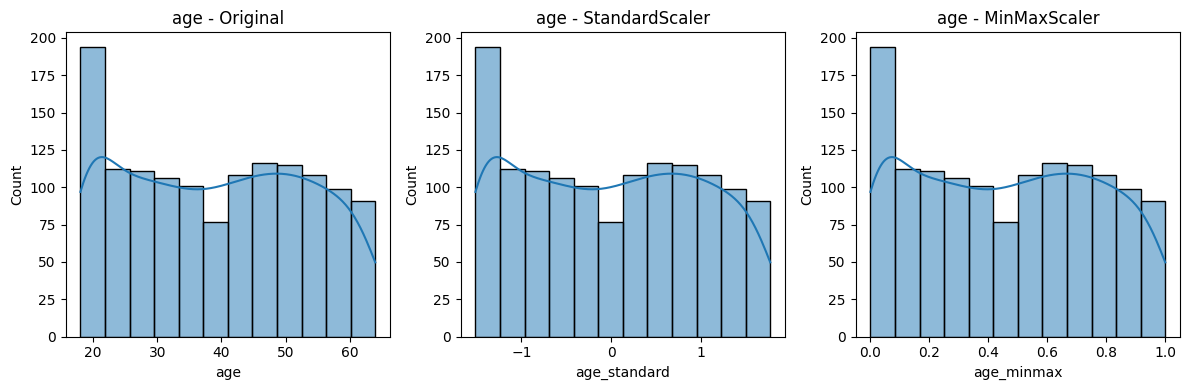

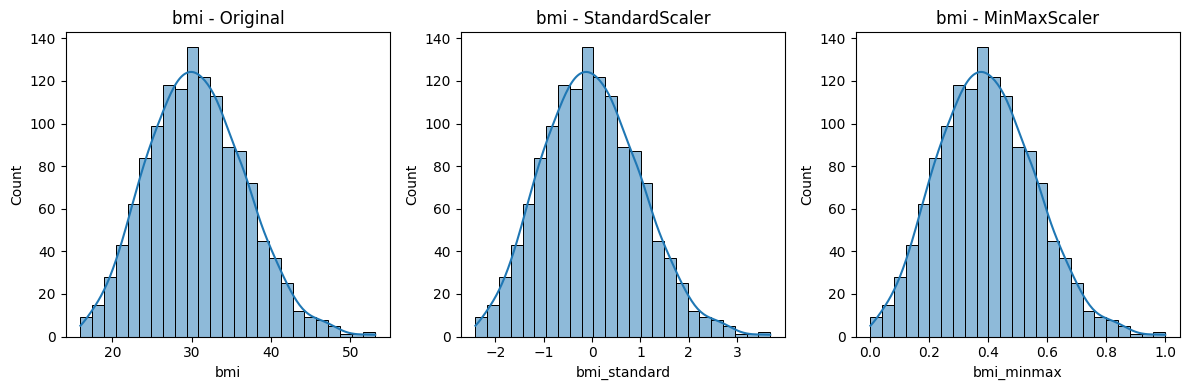

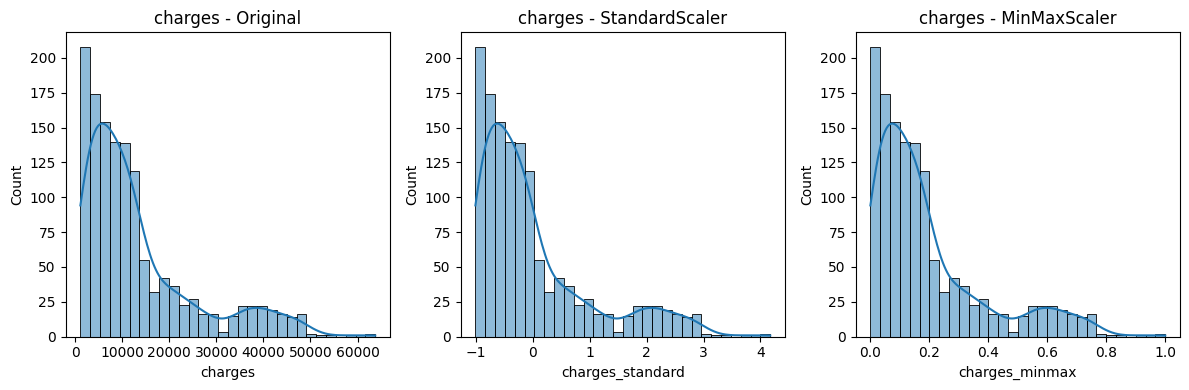

In [ ]:



for feature in num_features:
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    sns.histplot(df_scaled[feature], kde=True)
    plt.title(f"{feature} - Original")

    plt.subplot(1,3,2)
    sns.histplot(df_scaled[f"{feature}_standard"], kde=True)
    plt.title(f"{feature} - StandardScaler")

    plt.subplot(1,3,3)
    sns.histplot(df_scaled[f"{feature}_minmax"], kde=True)
    plt.title(f"{feature} - MinMaxScaler")

    plt.tight_layout()
    plt.show()

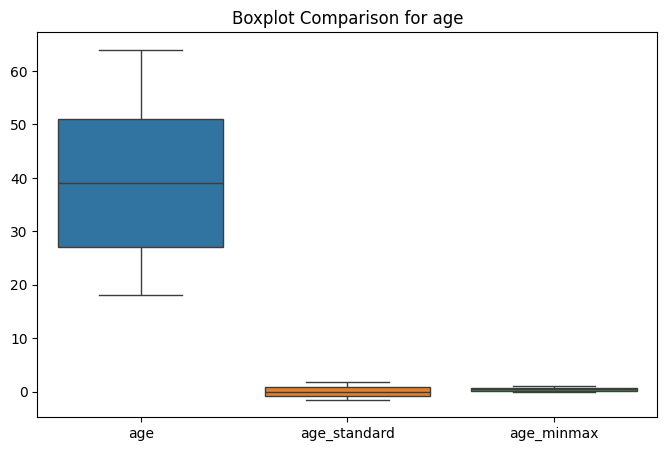

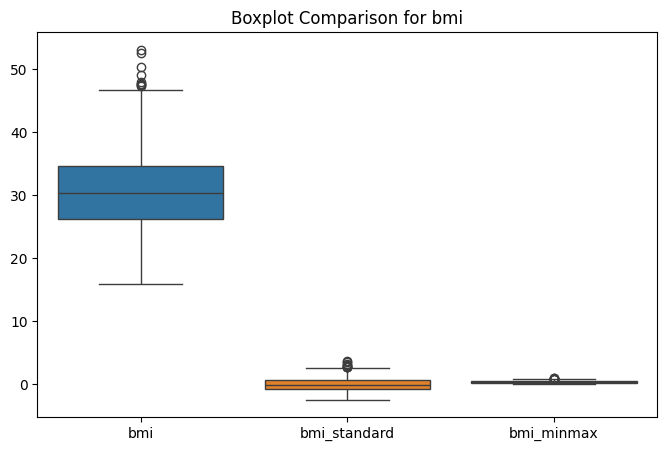

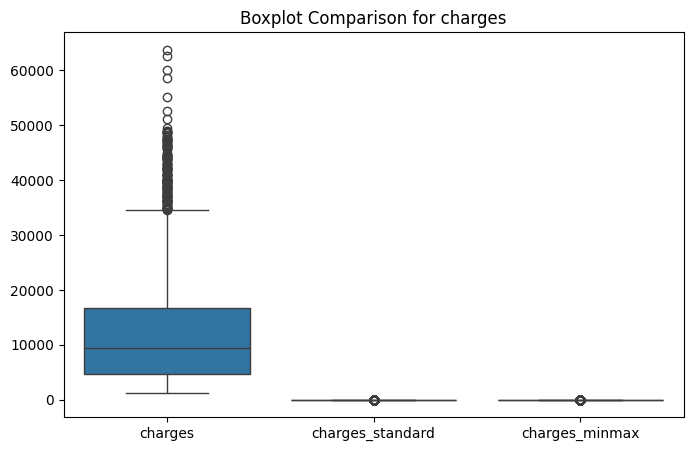

In [ ]:
for feature in num_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_scaled[[feature, f"{feature}_standard", f"{feature}_minmax"]])
    plt.title(f"Boxplot Comparison for {feature}")
    plt.show()


The dataset has categorical columns like sex, smoker, and region.
Use LabelEncoder and OneHotEncoder from sklearn.preprocessing to encode these features.


In [ ]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_df = df.copy()

le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    label_df[col] = le.fit_transform(label_df[col])

print("Label Encoded Data (first 5 rows):")
print(label_df.head())


Label Encoded Data (first 5 rows):
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [ ]:

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

onehot_df = df.copy()

ohe = OneHotEncoder(sparse_output=False)


encoded_array = ohe.fit_transform(onehot_df[['sex', 'smoker', 'region']])


encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(['sex', 'smoker', 'region']))


onehot_final = pd.concat([onehot_df.drop(['sex', 'smoker', 'region'], axis=1), encoded_df], axis=1)

print("\nOne-Hot Encoded Data (first 5 rows):")
print(onehot_final.head())




One-Hot Encoded Data (first 5 rows):
   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400         1.0       0.0        0.0   
1   18  33.770         1   1725.55230         0.0       1.0        1.0   
2   28  33.000         3   4449.46200         0.0       1.0        1.0   
3   33  22.705         0  21984.47061         0.0       1.0        1.0   
4   32  28.880         0   3866.85520         0.0       1.0        1.0   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0         1.0               0.0               0.0               0.0   
1         0.0               0.0               0.0               1.0   
2         0.0               0.0               0.0               1.0   
3         0.0               0.0               1.0               0.0   
4         0.0               0.0               1.0               0.0   

   region_southwest  
0               1.0  
1               0.0  
2               0.0  
3 